<a href="https://colab.research.google.com/github/Preranakh/Advanced-NLP/blob/main/Tweet_Emotion_Recognition_Learner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [8]:
!pip install nlp
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.7 MB/s eta 0:00:00


In [204]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.15.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [10]:
from datasets import load_dataset


In [14]:
dataset= load_dataset("emotion")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [15]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [16]:
train=dataset['train']

In [18]:
val=dataset['validation']

In [35]:
def get_tweet(data):
  tweets=[X['text']for X in data]
  labels=[X['label'] for X in data]
  return tweets, labels

In [36]:
tweets, labels=get_tweet(train)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [38]:
tweets[1],labels[1]

('i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 0)

In [39]:
train.to_pandas().head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [44]:
tokenizer=Tokenizer(num_words=10000, oov_token='<UNK')

In [45]:
tokenizer.fit_on_texts(tweets)

In [47]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [48]:
tweets[0]

'i didnt feel humiliated'

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

In [50]:
len(tweets)

16000

In [52]:
lengths=[len(t.split(' ')) for t in tweets]

(array([  8.,  45., 310., 488., 539., 625., 626., 629., 613., 636., 654.,
        655., 608., 622., 609., 603., 559., 535., 530., 510., 452., 430.,
        382., 385., 330., 327., 336., 317., 238., 208., 200., 200., 167.,
        157., 141., 144., 120., 117., 117.,  88.,  96.,  72.,  66.,  66.,
         65.,  52.,  37.,  43.,  30.,  32.,  31.,  26.,  30.,  20.,  23.,
         14.,   9.,  10.,   4.,   4.,   4.,   1.,   4.,   1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.]),
 <BarContainer object of 64 artists>)

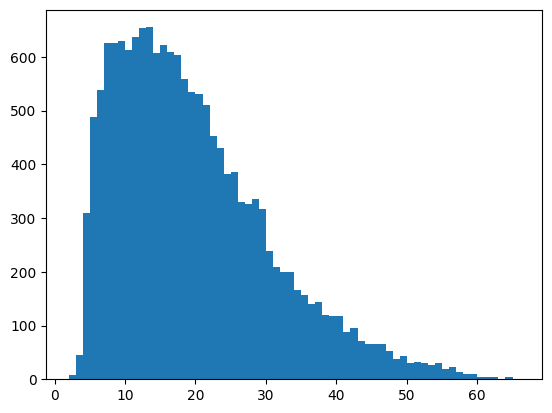

In [54]:
plt.hist(lengths, bins=len(set(lengths)))

In [55]:
plt.show()

In [56]:
maxlen=50

In [57]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [63]:
def get_sequences(tokenizer, tweets):
  sequences=tokenizer.texts_to_sequences(tweets)
  padded=pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

In [66]:
padded_train_seq=get_sequences(tokenizer, tweets)

In [68]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [70]:
classes=set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


in my example I already have the classes in the numeric form otherwise it was anger, joy, love, surprise, fear and sadness, but still the code might be useful for future reference

(array([4666.,    0.,    0., 5362.,    0.,    0., 1304.,    0.,    0.,
        2159.,    0.,    0., 1937.,    0.,  572.]),
 array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
        1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ,
        3.33333333, 3.66666667, 4.        , 4.33333333, 4.66666667,
        5.        ]),
 <BarContainer object of 15 artists>)

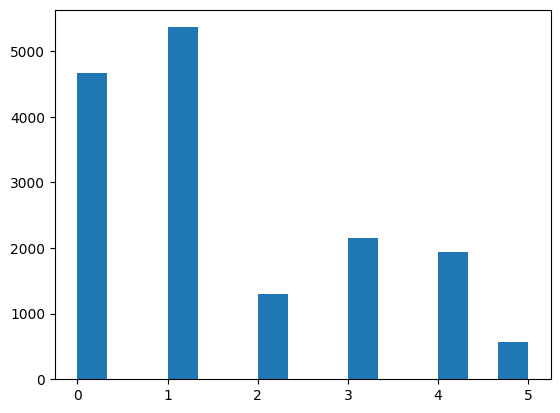

In [75]:
plt.hist(labels, bins=15)

this is called class imbalance problem, few classes in some while more in some category

In [79]:
class_to_index= dict((c,i) for i,c in enumerate (classes))
index_to_class = dict ((v,k) for k,v in class_to_index.items())

In [80]:
class_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [81]:
index_to_class

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [92]:
names_to_ids=lambda labels: np.array([class_to_index.get(x) for x in labels])

the above is the function to convert name to numeric values

In [84]:
train_labels=names_to_ids(labels)

In [98]:
print(train_labels[5])

0


In [122]:
import keras.api._v2.keras as keras

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [144]:
# prompt: I need touse the bidirectional

model= keras. Sequential([
    keras.layers.Embedding(100000,16,input_length=maxlen),
    keras.layers.Bidirectional(keras.layers.LSTM(20, return_sequences=True, activation='relu')),
    keras.layers.Bidirectional(keras.layers.LSTM(20)),
    keras.layers.Dense(6, activation='softmax')
    ])

model.compile (
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
     metrics=['accuracy']
)


In [145]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 50, 16)            1600000   
                                                                 
 bidirectional_4 (Bidirecti  (None, 50, 40)            5920      
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 6)                 246       
                                                                 
Total params: 1615926 (6.16 MB)
Trainable params: 1615926 (6.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

In [146]:
# prompt: fix above error i want to prepare the validation set

val_tweets, val_labels = get_tweet(val)


In [147]:
# prompt: now get val_seq

val_seq = get_sequences(tokenizer, list(val_tweets))


In [148]:
# prompt: now get val labels

val_labels = names_to_ids(val_labels)


In [149]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [150]:
h=model.fit(
   padded_train_seq, train_labels,
   validation_data= (val_seq, val_labels),
   epochs=20,
   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]

)

Epoch 1/20
500/500 [==============================] - 76s 136ms/step - loss: 1.3787 - accuracy: 0.4716 - val_loss: 0.9343 - val_accuracy: 0.6780
Epoch 2/20
500/500 [==============================] - 51s 102ms/step - loss: 0.7071 - accuracy: 0.7671 - val_loss: 0.6331 - val_accuracy: 0.7825
Epoch 3/20
500/500 [==============================] - 50s 100ms/step - loss: 0.4375 - accuracy: 0.8626 - val_loss: 0.4696 - val_accuracy: 0.8540
Epoch 4/20
500/500 [==============================] - 52s 103ms/step - loss: 0.3402 - accuracy: 0.8969 - val_loss: 0.4377 - val_accuracy: 0.8730
Epoch 5/20
500/500 [==============================] - 59s 118ms/step - loss: 0.2751 - accuracy: 0.9184 - val_loss: 0.4110 - val_accuracy: 0.8730
Epoch 6/20
500/500 [==============================] - 77s 154ms/step - loss: 0.2473 - accuracy: 0.9254 - val_loss: 0.4231 - val_accuracy: 0.8675


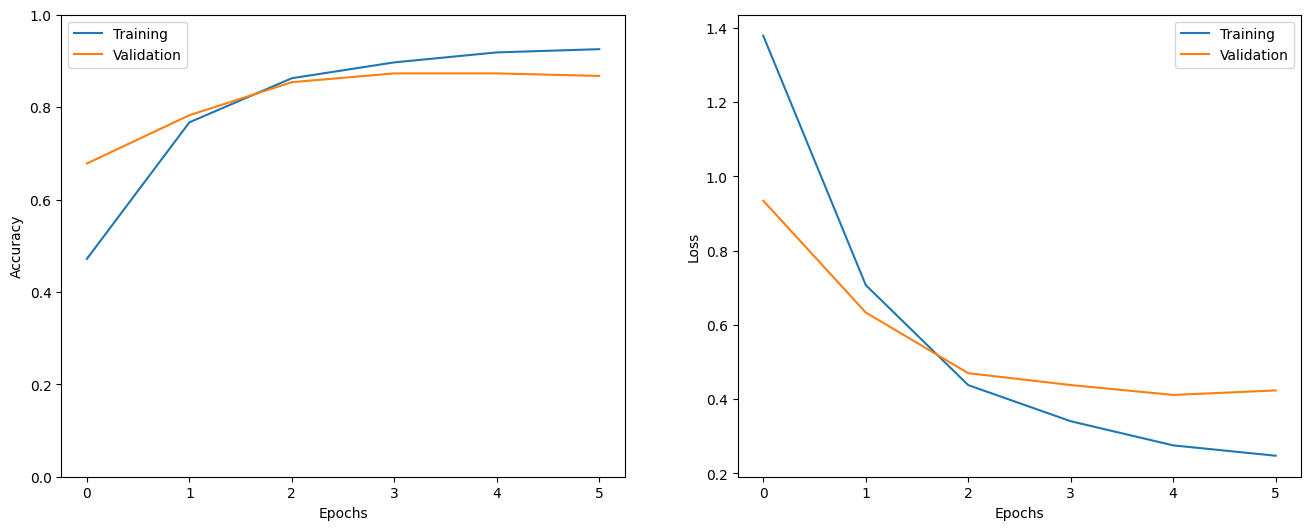

In [153]:
show_history(h)


Noe evaluating the model in the test set, preparing the test set

In [154]:
test_tweets, test_labels=get_tweet(test)
test_seq=get_sequences(tokenizer, test_tweets)

In [155]:
test_labels=names_to_ids (test_labels)

In [156]:
model.evaluate(test_seq, test_labels)

63/63 [==============================] - 3s 53ms/step - loss: 0.3919 - accuracy: 0.8740


[0.39185547828674316, 0.8740000128746033]

In [169]:
i= random.randint(0, len(test_labels)-1)
print('Sentence:', test_tweets[i])
print('Emotion', index_to_class[test_labels[i]])
p=model.predict(np.expand_dims(test_seq[i], axis= 0))[0]

Sentence: i either have to feel submissive and as such agree to taking pain for someone or there has to not be an option presented
Emotion 0
1/1 [==============================] - 0s 34ms/step


In [170]:
pred_class=index_to_class[np.argmax(p).astype ('uint8')]
print ('Predicted Emotion:', pred_class)

Predicted Emotion: 0


We can also see all the predictions towards all the ground truth. Code below